<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read the csv file
AirbnbData =pd.read_csv ("Airbnb_Open_Data.csv", low_memory=False)

In [3]:
## Display the first 5 rows
AirbnbData.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## Display the data types
AirbnbData.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
AirbnbData.drop(columns=["host id","id","country","country code"], axis= 1, inplace= True)

### Reason for not including droped columns:
- They are not needed for our task.
- Dropping unnecessary columns during data analysis in Python can be beneficial for several reasons:
1. Improved Performance:faster computation and analysis.
2. Simpler Analysis:unnecessary columns may introduce noise.
3. Reduced Memory Usage:this can be important when working with limited resources or when dealing with datasets that are too large to fit into memory.
4. Avoiding Multicollinearity: when two or more variables are highly correlated. 
5. Easier Visualization: when creating visualizations, a reduced set of columns makes it easier to generate clear and meaningful plot

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [6]:
## Check for missing values in the dataframe and display the count in ascending order.
AirbnbData.isnull().sum().sort_values()

room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64

In [7]:
#If the values are missing, impute the values as per the datatype of the columns.
for col in AirbnbData.columns:
    if AirbnbData[str(col)].dtype == 'object':
        print(col)
        AirbnbData[str(col)].fillna(value=AirbnbData[str(col)].mode()[0], inplace=True)
    else:
        AirbnbData[str(col)].fillna(value=AirbnbData[str(col)].median(), inplace=True)

NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
instant_bookable
cancellation_policy
room type
price
service fee
last review
house_rules
license


In [8]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
AirbnbData.duplicated().sum()


3461

### Duplicate values in the dataframe Before removing duplicates : 
- 3436

In [9]:
AirbnbData.shape

(102599, 22)

In [10]:
## Removing Duplicates
AirbnbData.drop_duplicates(inplace= True)

In [11]:
## Display the total number of records in the dataframe after removing the duplicates.
AirbnbData.shape

(99138, 22)

### Records in the dataframe After removing duplicates
- (99163, 22)

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [12]:
## Rename the column.
AirbnbData.rename(columns={"availability 365":"days_booked"},inplace=True)

In [13]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
AirbnbData.columns = [col.lower().replace(" ","_") for col in AirbnbData.columns]

In [14]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
def remove_dollar_comma_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float (value.replace("$","").replace(",","").replace(" ",""))

In [15]:
AirbnbData["price"] = AirbnbData["price"].apply(lambda x: remove_dollar_comma_sign(x))
AirbnbData["service_fee"] = AirbnbData["service_fee"].apply(lambda x: remove_dollar_comma_sign(x))

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [16]:
## List the count of various room types avaliable with Airbnb
AirbnbData["room_type"].value_counts()

room_type
Entire home/apt    51987
Private room       44887
Shared room         2149
Hotel room           115
Name: count, dtype: int64

### List the count of various room types avaliable with Airbnb
| Room Type         | Count         |
|-------------------|---------------|
| Entire home/apt   | 51987         |
| Private room      | 44887         |
| Shared room       | 2149          |
| Hotel room        | 115           |


In [17]:
## Which room type adheres to more strict cancellation policy
### filtering
AirbnbData_strict_policy= AirbnbData[AirbnbData["cancellation_policy"] == "strict"]

In [18]:
###counting per type room aginst filter
AirbnbData_strict_policy["room_type"].value_counts()

room_type
Entire home/apt    17238
Private room       14936
Shared room          718
Hotel room            34
Name: count, dtype: int64

### Room type with more strict cancellation policy
- Entire home/apt with 17238 among 32926 record of strict cancelation policy

In [19]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
AirbnbData["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'Staten Island', 'Bronx'], dtype=object)

- By running most_expensive_neighbourhood_group= AirbnbData["price"].groupby(
    AirbnbData["neighbourhood_group"]).mean().round(2).sort_values(ascending=False).reset_index()
 output is as below wich obviously there are some mistype error in it.
| neighbourhood_group | price       |
|----------------------|-------------|
| Queens               | 628.668822  |
| Brooklyn             | 625.471627  |
| Bronx                | 625.271511  |
| Staten Island        | 625.060870  |
| Manhattan            | 621.666140  |
| brookln              | 580.000000  |
| manhatan             | 460.000000  |

## Inconsistent Data Entry
- Based on link provided for this project, data set is about New York city, since there is no counties as brookln and manhatan, it seems they are unintentional data entry error which can affect overall data quality and analysises 
- As such, I decided to address it and update my data set accordingly.
- Although mentioned correction in average price calculation against Neighbourhood Group does not show changes but in analysing booked days we can see different results. 
- For further information on NY counties please look at https://en.wikipedia.org/wiki/New_York_City 
- There are also 13 row of with minimum night of negative value which I catch them by running  AirbnbData[AirbnbData['minimum_nights']<0] but I decided to go with them and filter them further down the road

In [20]:
## Handeling mistype errors
def replace_mistype_error(value):
    if pd.isna(value):
        return np.NaN
    else:
        return value.replace("manhatan","Manhattan").replace("brookln","Brooklyn")

In [21]:
AirbnbData["neighbourhood_group"] = AirbnbData["neighbourhood_group"].apply(lambda x: replace_mistype_error(x))

In [22]:
AirbnbData["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [23]:
##List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
most_expensive_neighbourhood_group= AirbnbData["price"].groupby(
    AirbnbData["neighbourhood_group"]).mean().round(2).sort_values(ascending=False).reset_index()

### Price list by neighborhood group and the **Most** expensive neighborhood group for rental
| neighbourhood_group | price       |
|----------------------|------------|
| Queens               | 628.67     |
| Brooklyn             | 625.47     |
| Bronx                | 625.27     |
| Staten Island        | 625.06     |
| Manhattan            | 621.66     |


-  **Queens**  is the most expensive neighborhood group for rental as averagly prices there are at top

## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

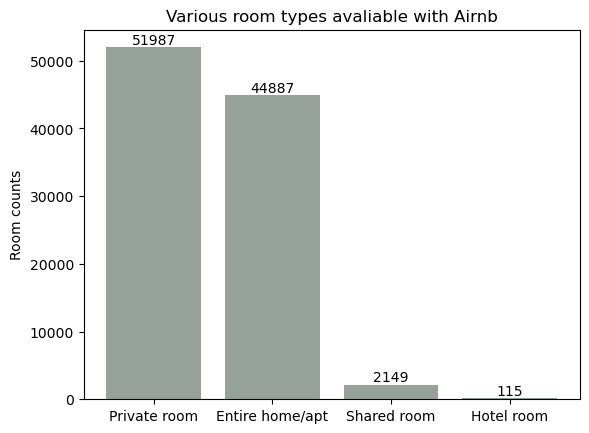

In [24]:
room_types_avaliable_vis = fig, ax = plt.subplots()
bar_container = ax.bar(AirbnbData["room_type"].unique(), AirbnbData["room_type"].value_counts(),color="#95a199")
ax.set(ylabel='Room counts', title='Various room types avaliable with Airnb')
ax.bar_label(bar_container)
plt.show()

In [25]:
most_strict_type=AirbnbData_strict_policy['cancellation_policy'].groupby(AirbnbData_strict_policy['room_type']).value_counts().sort_values(ascending= False).reset_index()


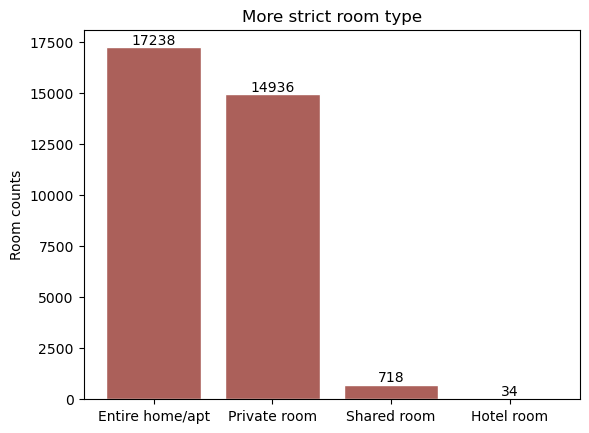

In [26]:
more_strict_cancellation_policy_vis= fig, ax = plt.subplots()

bar_container=ax.bar(most_strict_type["room_type"], most_strict_type["count"], 
                     edgecolor="white", color="#ab605a")
ax.set(ylabel='Room counts', title='More strict room type')
ax.bar_label(bar_container)
plt.show()

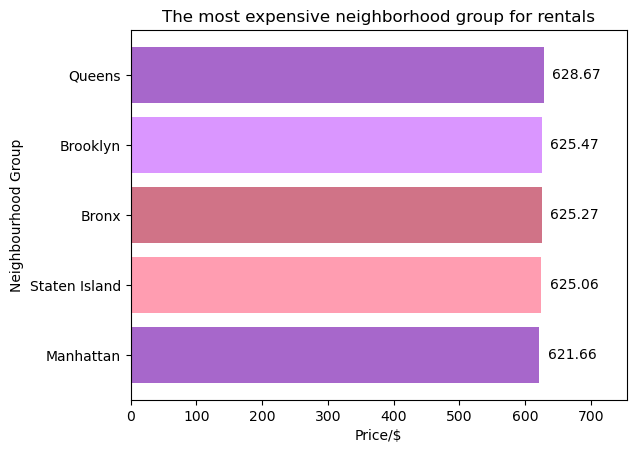

In [27]:
most_expensive_neighbourhood_group_vis= fig, ax = plt.subplots()
color= ["#a767cb","#da96ff","#d07387","#ff9db1"]
bar_container = ax.barh(most_expensive_neighbourhood_group["neighbourhood_group"], most_expensive_neighbourhood_group["price"],color=color, 
                       )

ax.set(ylabel='Neighbourhood Group',xlabel="Price/$", title='The most expensive neighborhood group for rentals',)
ax.invert_yaxis() 
ax.margins(x=.2)
ax.bar_label(bar_container,padding=6)
plt.show()

### The most expensive neighborhood group for rentals
- The most expensive neighborhood group for rentals is **Queens** with average price of **628.67 $** 
- Although price gap between different neighbourhood groups is not remarkable 

In [28]:
neighbourhood_price = AirbnbData['price'].groupby(AirbnbData['neighbourhood']).mean().round(2).sort_values(ascending=False
                                                                                                             ).reset_index()
neighbourhood_price_top = neighbourhood_price.head(10)

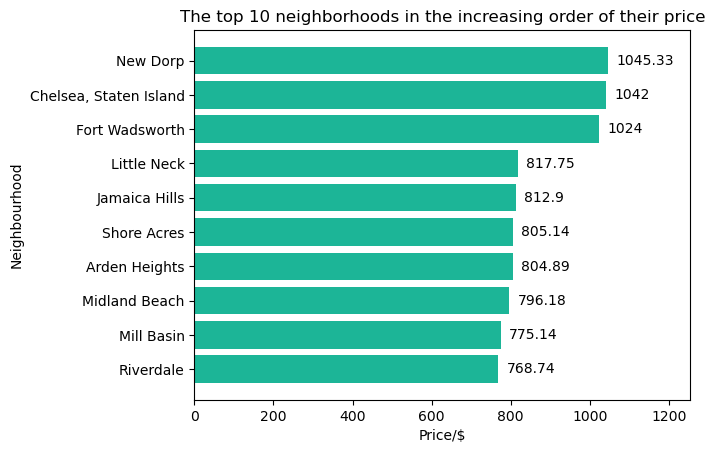

In [29]:
neighbourhood_price_top_vis= fig, ax = plt.subplots()

bar_container = ax.barh(neighbourhood_price_top["neighbourhood"], neighbourhood_price_top["price"],color="#1cb597", 
                       )

ax.set(ylabel='Neighbourhood',xlabel="Price/$", title='The top 10 neighborhoods in the increasing order of their price')
ax.invert_yaxis() 
ax.margins(x=.2)
ax.bar_label(bar_container,padding=6)
plt.show()

In [30]:
neighbourhood_price = AirbnbData['price'].groupby(AirbnbData['neighbourhood']).mean().round(2).sort_values().reset_index()
neighbourhood_price_cheapest = neighbourhood_price.head(10)

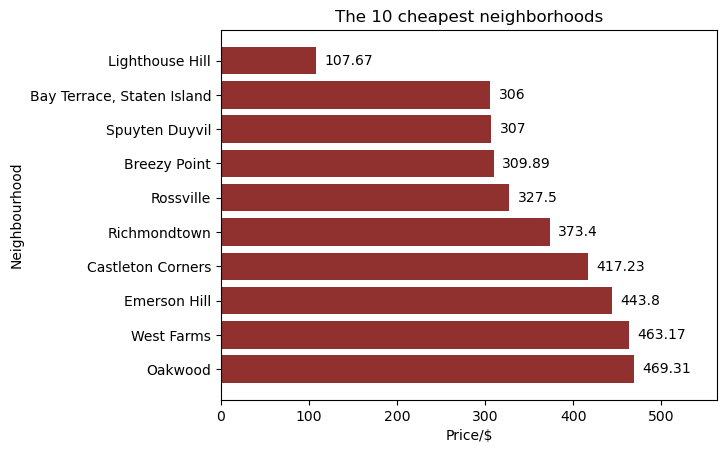

In [66]:
fig, ax = plt.subplots()

bar_container = ax.barh(neighbourhood_price_cheapest["neighbourhood"], neighbourhood_price_cheapest["price"],color="#91312f", 
                       )

ax.set(ylabel='Neighbourhood',xlabel="Price/$", title='The 10 cheapest neighborhoods')
ax.invert_yaxis() 
ax.margins(x=.2)
ax.bar_label(bar_container,padding=6)
plt.show()

### The cheapest neighborhood is
- **Lighthouse Hill** with avarage price of **107.67 $**

In [39]:
## filtering for short term 
## there are 10 record of negative minimum night, it does not seem reasonable but their other properties seem correct so I just filter them
short_term= AirbnbData[(AirbnbData["minimum_nights"] < 10) & (AirbnbData["minimum_nights"] > 0)]

In [44]:
Max_AirbnbData_short_term= short_term["minimum_nights"].groupby(short_term['neighbourhood_group']).max().sort_values(ascending=False).reset_index()
Max_AirbnbData_short_term

,neighbourhood_group,minimum_nights
0,Bronx,9.0
1,Brooklyn,9.0
2,Manhattan,9.0
3,Queens,9.0
4,Staten Island,7.0


In [45]:
Min_AirbnbData_short_term= short_term["minimum_nights"].groupby(short_term['neighbourhood_group']).min().sort_values(ascending=False).reset_index()
Min_AirbnbData_short_term

,neighbourhood_group,minimum_nights
0,Bronx,1.0
1,Brooklyn,1.0
2,Manhattan,1.0
3,Queens,1.0
4,Staten Island,1.0


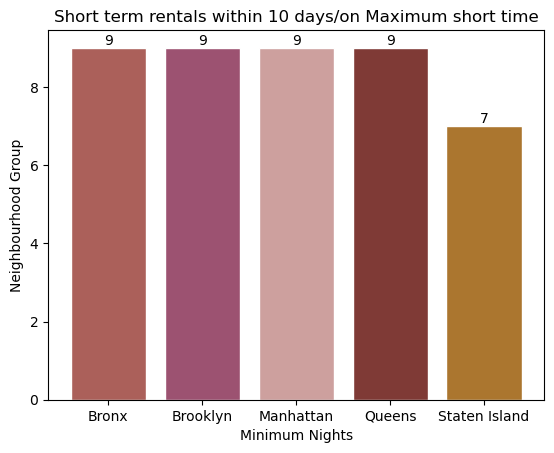

In [65]:
Max_minimum_night_vis= fig, ax = plt.subplots()
color=["#ab605a","#9c5271","#cda09e","#7f3a36","#ab762f"]
bar_container=ax.bar(AirbnbData_short_term["neighbourhood_group"], AirbnbData_short_term["minimum_nights"], 
                     edgecolor="white", color=color)
ax.set(ylabel='Neighbourhood Group',xlabel="Minimum Nights", title='Short term rentals within 10 days/on Maximum short time')
ax.bar_label(bar_container)
plt.show()

In [49]:
##List the prices with respect to room type using a bar graph and also state your inferences.
room_type_price = AirbnbData['price'].groupby(AirbnbData['room_type']).mean().round(2).sort_values(ascending=False).reset_index()
room_type_price

,room_type,price
0,Hotel room,666.39
1,Shared room,630.91
2,Entire home/apt,624.23
3,Private room,623.84


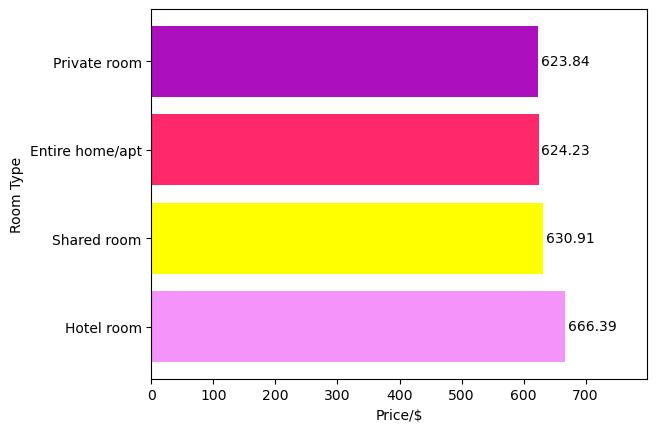

In [50]:
room_type_price_vis= fig, ax = plt.subplots()
color= ["#f494fb","#ffff00","#ff286a","#ac10be"]
bar_container = ax.barh(room_type_price["room_type"],room_type_price["price"], color= color
                     )

ax.set(ylabel='Room Type',xlabel="Price/$")

ax.margins(x=.2)
ax.bar_label(bar_container,padding=2)

plt.show()

In [51]:
## checking shared proom price as it stands in second place in respect of aerage price
result_subset = AirbnbData[['price', 'room_type']].sort_values(by="price",ascending= False)

In [52]:
value = "Shared room"
result_checking = result_subset[(result_subset['room_type'] == value) & (result_subset['price']>670)]
result_checking.head(5)

,price,room_type
22073,1199.0,Shared room
101027,1199.0,Shared room
79237,1199.0,Shared room
78104,1199.0,Shared room
90762,1199.0,Shared room


### Inferences regarding prices with respect to room type
- It seems people renting through Airbnb in New York city have demand for renting a Shared Room more than Entire home/apt or Private Room. Therefore avarege price for this type of room hold the sencond place in matter of most expensive ones.

- There are 1032 records for Shared Room that their price are higher than 670 $ whcih is avarage price for Hotel Room category.

- Hotel Rooms average price for renting from Airbnb is 666.39 $ which seems higher than normal price in same year. 

- According to https://www.statista.com/ "The average daily rate of hotels in New York appears to be much higher in the fourth quarter of the year, reaching 389 U.S. dollars in 2016".

- It seems more expensive Hotels tend to offer thier rooms on Airbnb, where they can ask for higher price.

- Chosing which type of room is more matter of taste than matter of affordability. As there are not that much of difference in average price of all room types.

<a href="https://www.statista.com/statistics/202391/average-daily-rate-of-hotels-in-new-york/" rel="nofollow"><img src="https://www.statista.com/graphic/1/202391/average-daily-rate-of-hotels-in-new-york.jpg" alt="Statistic: Quarterly average daily rate of hotels in New York in 2016 and 2017 (in U.S. dollars) | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br />Find more statistics at  <a href="https://www.statista.com" rel="nofollow">Statista</a>


In [54]:
##Create a pie chart that shows distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage

In [56]:
booked_days_neighborhood_group=AirbnbData['days_booked'].groupby(AirbnbData['neighbourhood_group']).mean().sort_values().reset_index()
booked_days_neighborhood_group

,neighbourhood_group,days_booked
0,Brooklyn,130.763363
1,Manhattan,142.702121
2,Queens,162.424977
3,Bronx,178.993117
4,Staten Island,195.989130


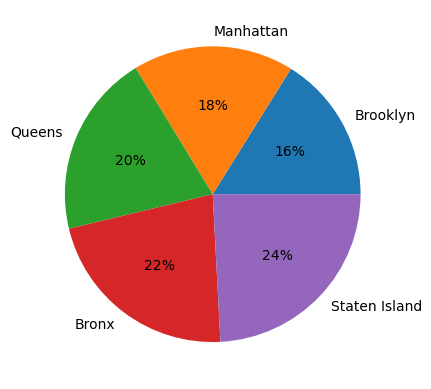

In [57]:
highest_booked_days_neighborhood_group_vis= plt.pie(booked_days_neighborhood_group['days_booked'], labels=booked_days_neighborhood_group['neighbourhood_group'], autopct='%.0f%%')
plt.show()

### Neighborhood with the highest booking percentage
- **Staten Island** with 24% has most booked day
- If we look at maximum of minimum night and average price in this neighborhood group it adds up.

## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

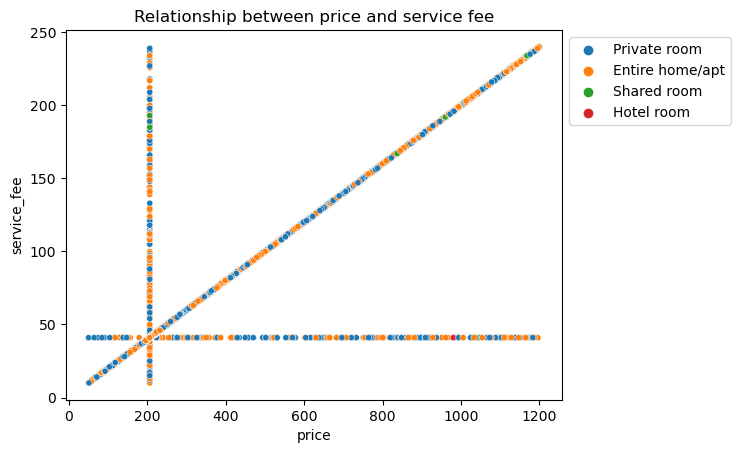

In [58]:
relation_roomtype_price_vis= plt.figure()
plt.title('Relationship between price and service fee')
sns.scatterplot(x=AirbnbData['price'],y=AirbnbData['service_fee'], hue=AirbnbData['room_type'], s=20)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
ax.set(ylabel='Service Fee',xlabel="Price/$")
plt.show()

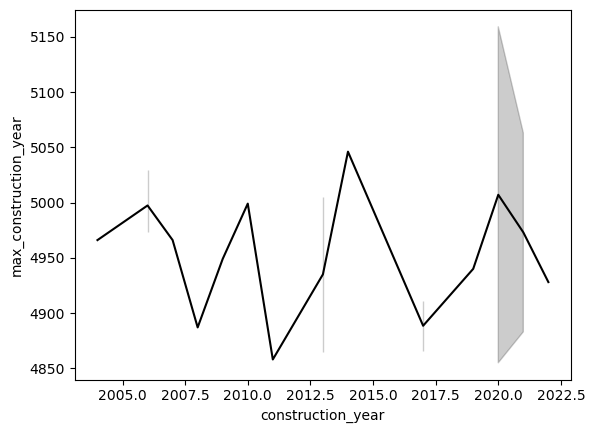

In [59]:
max_construction_year_vis= AirbnbData['max_construction_year']=AirbnbData['construction_year'].value_counts()
sns.lineplot(x='construction_year',y='max_construction_year',data=AirbnbData, color="black")
plt.show()

## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

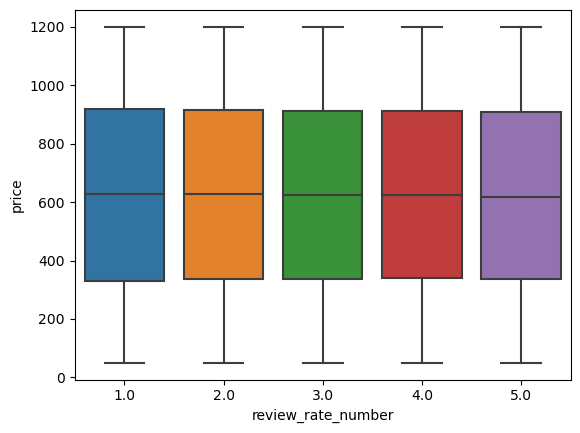

In [60]:
effect_review_price_vis = ax= sns.boxplot(x='review_rate_number',y='price',data=AirbnbData)
plt.show()

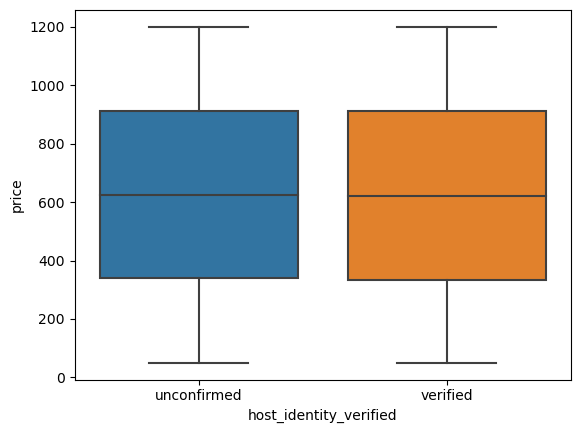

In [62]:
effect_verified_identity_price_vis= sns.boxplot(x='host_identity_verified',y='price',data=AirbnbData)
plt.show()

## Special Thanks to 
All IBM team for fantastic opportunity that they provide for all of us 